<a href="https://colab.research.google.com/github/elyianaa/Early-Detection-of-AD-Using-CNN/blob/main/ad_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
df = files.upload()

Saving oasis_longitudinal_demographics.xlsx to oasis_longitudinal_demographics.xlsx


In [ ]:
sns.set()

df = pd.read_excel('oasis_longitudinal_demographics.xlsx')
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,21.0,2.0,1502.836122,0.659579,1.167792
1,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,25.0,2.0,1710.450000,0.759990,1.026040
2,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,3.0,15.0,2.0,1401.130000,0.700165,1.252560
3,OAS2_0087,OAS2_0087_MR1,Demented,1,0,F,R,96,17,1.0,26.0,1.0,1464.910000,0.682722,1.198030
4,OAS2_0046,OAS2_0046_MR2,Demented,2,575,F,R,85,15,2.0,22.0,1.0,1483.250000,0.747742,1.183210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0022,OAS2_0022_MR1,Nondemented,1,0,F,R,61,16,3.0,30.0,0.0,1312.780000,0.804868,1.336850
369,OAS2_0094,OAS2_0094_MR1,Nondemented,1,0,F,R,61,16,1.0,30.0,0.0,1512.750000,0.771088,1.160140
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319.020000,0.801006,1.330540
371,OAS2_0030,OAS2_0030_MR1,Nondemented,1,0,F,R,60,18,1.0,30.0,0.0,1402.100000,0.821582,1.251690


In [ ]:
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary column

In [ ]:
df

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0087,1,0,0,96,17,1.0,26.0,1.0,1464.91,0.682722,1.19803
1,OAS2_0071,1,0,0,83,13,2.0,27.0,1.0,1390.81,0.704681,1.26185
2,OAS2_0146,1,0,0,80,15,2.0,20.0,1.0,1731.90,0.684678,1.01334
3,OAS2_0064,1,0,0,78,8,5.0,23.0,1.0,1462.40,0.690761,1.20009
4,OAS2_0088,1,0,1,78,12,4.0,21.0,1.0,1477.47,0.671714,1.18784
...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0022,0,0,0,61,16,3.0,30.0,0.0,1312.78,0.804868,1.33685
146,OAS2_0094,0,0,0,61,16,1.0,30.0,0.0,1512.75,0.771088,1.16014
147,OAS2_0186,0,0,0,61,13,2.0,30.0,0.0,1319.02,0.801006,1.33054
148,OAS2_0030,0,0,0,60,18,1.0,30.0,0.0,1402.10,0.821582,1.25169


In [ ]:
# bar drawing function
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and Demented rate')

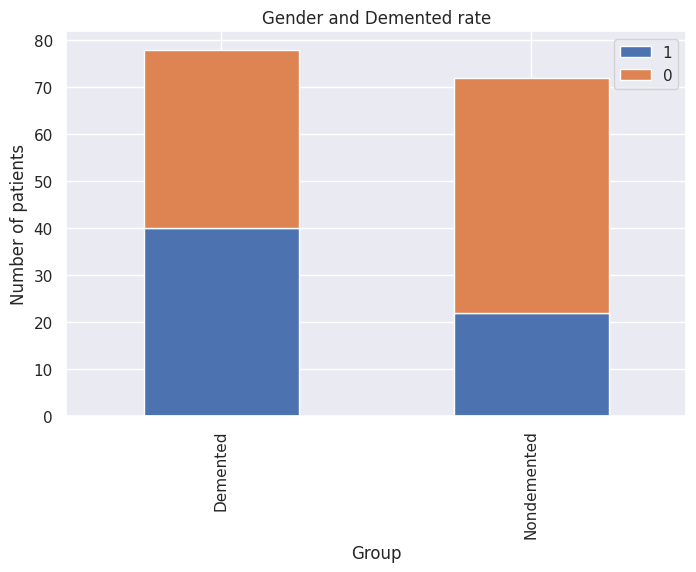

In [ ]:
# Gender  and  Group ( Femal=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(15.3, 30.0)

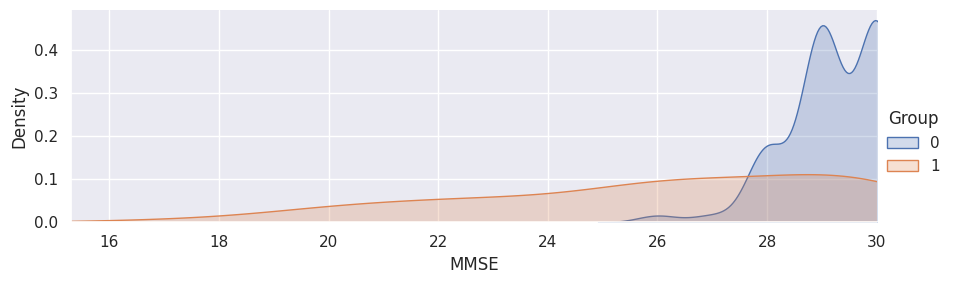

In [ ]:
#MMSE : Mini Mental State Examination
# Nondemented = 0, Demented =1
# Nondemented has higher test result ranging from 25 to 30.
#Min 17 ,MAX 30
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

(0.6, 0.9)

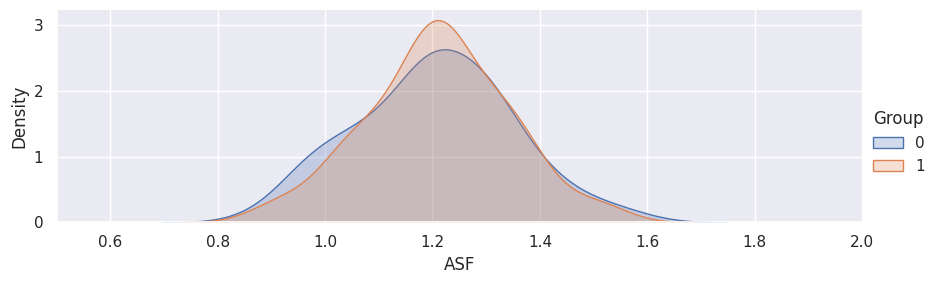

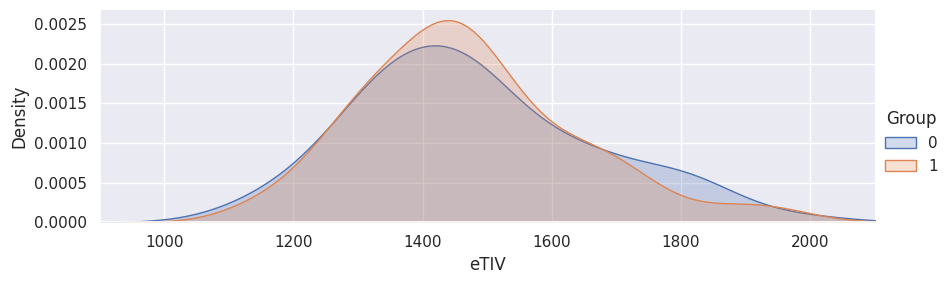

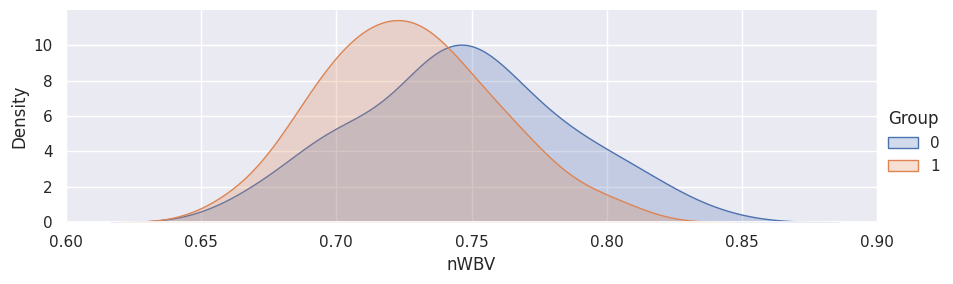

In [ ]:
#bar_chart('ASF') = Atlas Scaling Factor
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalized Whole Brain Volume
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(50.0, 100.0)

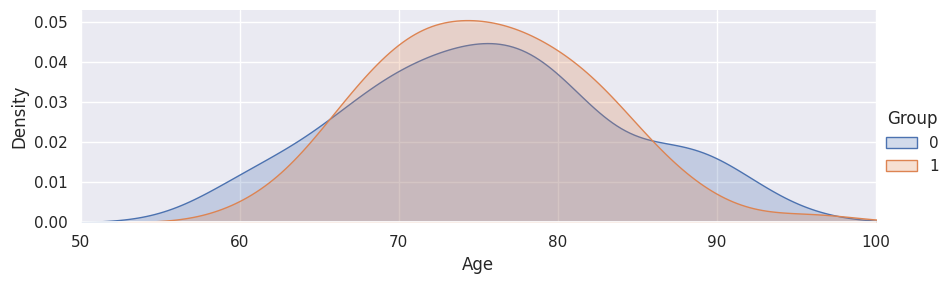

In [ ]:
#AGE. Nondemented =0, Demented =0
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 0.16)

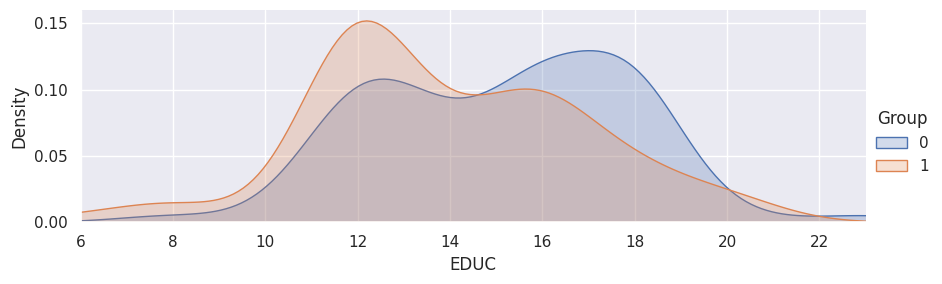

In [ ]:
#'EDUC' = Years of Education
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

In [ ]:
df

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0087,1,0,0,96,17,1.0,26.0,1.0,1464.91,0.682722,1.19803
1,OAS2_0071,1,0,0,83,13,2.0,27.0,1.0,1390.81,0.704681,1.26185
2,OAS2_0146,1,0,0,80,15,2.0,20.0,1.0,1731.90,0.684678,1.01334
3,OAS2_0064,1,0,0,78,8,5.0,23.0,1.0,1462.40,0.690761,1.20009
4,OAS2_0088,1,0,1,78,12,4.0,21.0,1.0,1477.47,0.671714,1.18784
...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0022,0,0,0,61,16,3.0,30.0,0.0,1312.78,0.804868,1.33685
146,OAS2_0094,0,0,0,61,16,1.0,30.0,0.0,1512.75,0.771088,1.16014
147,OAS2_0186,0,0,0,61,13,2.0,30.0,0.0,1319.02,0.801006,1.33054
148,OAS2_0030,0,0,0,60,18,1.0,30.0,0.0,1402.10,0.821582,1.25169


In [ ]:
# Check missing values by each column
pd.isnull(df).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
# DRemove row with missing values
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
df

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0087,1,0,0,96,17,1.0,26.0,1.0,1464.91,0.682722,1.19803
1,OAS2_0071,1,0,0,83,13,2.0,27.0,1.0,1390.81,0.704681,1.26185
2,OAS2_0146,1,0,0,80,15,2.0,20.0,1.0,1731.90,0.684678,1.01334
3,OAS2_0064,1,0,0,78,8,5.0,23.0,1.0,1462.40,0.690761,1.20009
4,OAS2_0088,1,0,1,78,12,4.0,21.0,1.0,1477.47,0.671714,1.18784
...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0022,0,0,0,61,16,3.0,30.0,0.0,1312.78,0.804868,1.33685
146,OAS2_0094,0,0,0,61,16,1.0,30.0,0.0,1512.75,0.771088,1.16014
147,OAS2_0186,0,0,0,61,13,2.0,30.0,0.0,1319.02,0.801006,1.33054
148,OAS2_0030,0,0,0,60,18,1.0,30.0,0.0,1402.10,0.821582,1.25169


In [ ]:
df_dropna['Group'].value_counts()

0    72
1    70
Name: Group, dtype: int64

In [ ]:
df.shape

(150, 12)

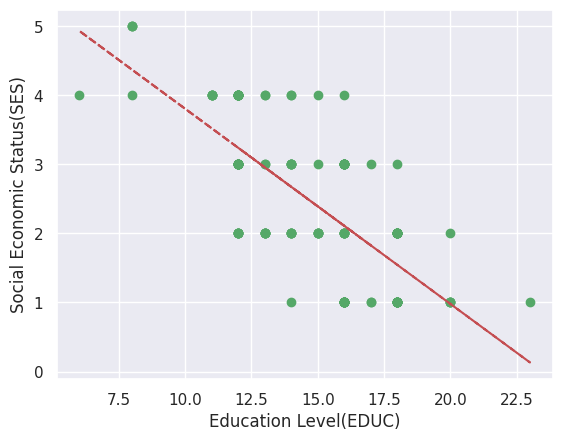

In [ ]:
# Imputation
# Draw scatter plot between EDUC and SES
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

# Draw trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [ ]:
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [ ]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)
pd.isnull(df['SES']).value_counts()

False    150
Name: SES, dtype: int64

In [ ]:
# Splitting Test/Validation/Train Sets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [ ]:
# Dataset with imputation
Y = df['Group'].values # Target for the model
X = df[['EDUC', 'SES', 'MMSE','CDR', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Dataset after dropping missing value rows
Y = df_dropna['Group'].values # Target for the model
X = df_dropna[['EDUC', 'SES', 'MMSE','CDR', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_train_dna, X_test_dna, Y_train_dna, Y_test_dna = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_train_dna)
X_train_scaled_dna = scaler.transform(X_train_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

In [ ]:
df

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0087,1,0,0,96,17,1.0,26.0,1.0,1464.91,0.682722,1.19803
1,OAS2_0071,1,0,0,83,13,2.0,27.0,1.0,1390.81,0.704681,1.26185
2,OAS2_0146,1,0,0,80,15,2.0,20.0,1.0,1731.90,0.684678,1.01334
3,OAS2_0064,1,0,0,78,8,5.0,23.0,1.0,1462.40,0.690761,1.20009
4,OAS2_0088,1,0,1,78,12,4.0,21.0,1.0,1477.47,0.671714,1.18784
...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0022,0,0,0,61,16,3.0,30.0,0.0,1312.78,0.804868,1.33685
146,OAS2_0094,0,0,0,61,16,1.0,30.0,0.0,1512.75,0.771088,1.16014
147,OAS2_0186,0,0,0,61,13,2.0,30.0,0.0,1319.02,0.801006,1.33054
148,OAS2_0030,0,0,0,60,18,1.0,30.0,0.0,1402.10,0.821582,1.25169


In [ ]:
X_normalized = preprocessing.normalize(X)
X_normalized

array([[1.16021896e-02, 6.82481740e-04, 1.77445253e-02, 6.82481740e-04,
        9.99774326e-01, 4.65945299e-04, 8.17633600e-04],
       [9.34488514e-03, 1.43767464e-03, 1.94086076e-02, 7.18837318e-04,
        9.99766131e-01, 5.06551000e-04, 9.07064870e-04],
       [8.66009656e-03, 1.15467954e-03, 1.15467954e-02, 5.77339771e-04,
        9.99894749e-01, 3.95291840e-04, 5.85041483e-04],
       [5.46966555e-03, 3.41854097e-03, 1.57252885e-02, 6.83708194e-04,
        9.99854863e-01, 4.72278956e-04, 8.20511367e-04],
       [8.12086916e-03, 2.70695639e-03, 1.42115210e-02, 6.76739097e-04,
        9.99861713e-01, 4.54575126e-04, 8.03857769e-04],
       [8.04586344e-03, 2.01146586e-03, 1.54212383e-02, 6.70488620e-04,
        9.99846041e-01, 4.75969144e-04, 7.89091352e-04],
       [1.16705716e-02, 5.83528578e-04, 1.34211573e-02, 5.83528578e-04,
        9.99841206e-01, 4.41218795e-04, 5.97684981e-04],
       [9.93700169e-03, 2.12935750e-03, 1.77446459e-02, 7.09785835e-04,
        9.99790131e-01, 5

In [ ]:
df_normalized = pd.DataFrame(X_normalized)
df_normalized

,0,1,2,3,4,5,6
0,0.011602,0.000682,0.017745,0.000682,0.999774,0.000466,0.000818
1,0.009345,0.001438,0.019409,0.000719,0.999766,0.000507,0.000907
2,0.008660,0.001155,0.011547,0.000577,0.999895,0.000395,0.000585
3,0.005470,0.003419,0.015725,0.000684,0.999855,0.000472,0.000821
4,0.008121,0.002707,0.014212,0.000677,0.999862,0.000455,0.000804
...,...,...,...,...,...,...,...
137,0.012184,0.002284,0.022845,0.000000,0.999661,0.000613,0.001018
138,0.010574,0.000661,0.019826,0.000000,0.999747,0.000510,0.000767
139,0.009853,0.001516,0.022737,0.000000,0.999691,0.000607,0.001008
140,0.012834,0.000713,0.021390,0.000000,0.999688,0.000586,0.000892


In [ ]:
df_normalized.to_csv("Normalized OASIS-2.csv", index=False)

In [ ]:
!pip install Boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.1 MB/s eta 0:00:00


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, n_jobs=-1, max_depth=5)

trans = BorutaPy(clf, random_state=20, verbose=2)
sel = trans.fit_transform(X.values, y.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	5


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	5


In [ ]:
trans.ranking_

array([1, 1, 4, 5, 2, 2, 2])

In [ ]:
def visualize_feature_importance(features, importances):
    # Sort features and importances in descending order
    features_sorted = [f for _, f in sorted(zip(importances, features), reverse=True)]
    importances_sorted = sorted(importances, reverse=True)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances_sorted, y=features_sorted)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Plot')
    plt.show()

In [ ]:
def visualize_feature_importance(features, importances):
    # Sort features and importances in ascending order
    features_sorted = [f for _, f in sorted(zip(importances, features))]
    importances_sorted = sorted(importances)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances_sorted, y=features_sorted)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Plot')
    plt.show()


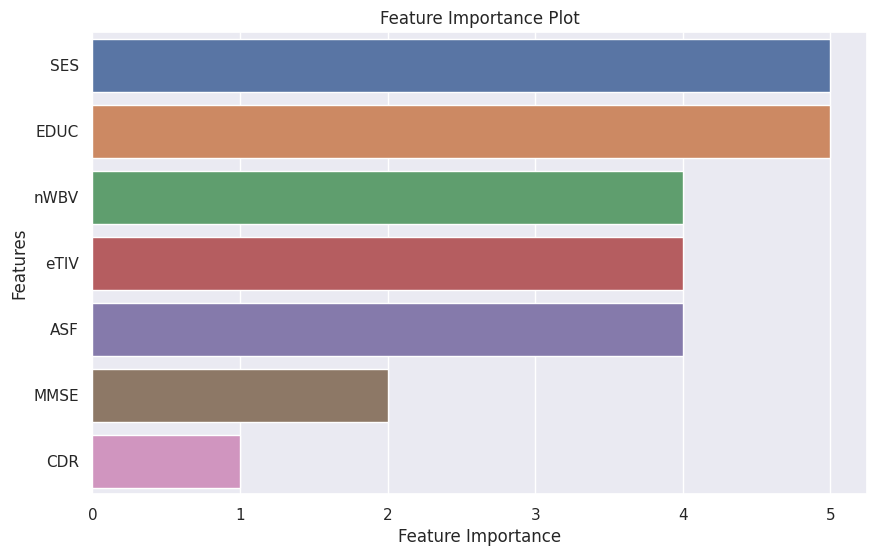

In [ ]:
# Example feature names and importances
feature_names = ['EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
feature_importances = [5, 5, 2, 1, 4, 4, 4]

# Call the visualization function
visualize_feature_importance(feature_names, feature_importances)
